In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

A Binary Genetic Algorithm that uses fitness proportional selection, 2-point crossover, and bit-flip mutation to solve the problem in which the fitness is the number of separated pairs of 1s in the chromosome, i.e. f ( [1,1,0,1,0] ) = 1, f ( [1,0,0,1,0] ) = 0, f ( [1,1,1,0,0] ) = 1, f ( [1,1,0,1,1] ) = 2

In [2]:
def get_fitness(chromosome):
    fitness = 0
    pairs = True
    for i in range(len(chromosome)-1):
        if chromosome[i] == 0:
            pairs = True
        elif chromosome[i] == 1 and chromosome[i+1] == 1 and pairs:
            fitness +=1
            pairs = False
    return fitness

In [3]:
def discrete_sample(probabilities):
    sorter = np.cumsum(probabilities)
    values = np.random.uniform()
    sample = np.searchsorted(sorter, values)
    return sample

In [4]:
def fitness_proportional_selection(fitnesses):
    probabilities = fitnesses / np.sum(fitnesses)
    sample = discrete_sample(probabilities)
    return sample

In [5]:
def bitflip_mutation(chromosome, mutation_rate):
    mutation = np.random.uniform(size=chromosome.shape)
    mutation_mask = (mutation <= mutation_rate)
    mutated = np.array(np.logical_xor(chromosome, mutation_mask))
    return mutated

In [6]:
def one_point_crossover(parentA, parentB):
    index = np.random.randint(0, len(parentA))
    childA = np.concatenate([parentA[:i], parentB[i:]])
    childB = np.concatenate([parentB[:i], parentA[i:]])
    return childA, childB

In [7]:
def two_point_crossover(parentA, parentB):
    index = np.sort(np.random.randint(0, len(parentA),2))
    childA = np.concatenate([parentA[:index[0]], parentB[index[0]:index[1]], parentA[index[1]:]])
    childB = np.concatenate([parentB[:index[0]], parentA[index[0]:index[1]], parentB[index[1]:]])
    return childA, childB

In [8]:
def generate_initial_population(length, population_size):
    population = []
    for i in range(population_size):
        population.append(np.random.randint(0,2,size=length))
    return population

In [9]:
def ga(length, population_size, mutation_rate, cross_over_rate=1.0, max_gen=1000):
    population = generate_initial_population(length, population_size)
    fitness = []
    for gen in range(max_gen):
        fitnesses = np.array([get_fitness(chromosome) for chromosome in population])
        fitness.append((fitnesses.min(), fitnesses.mean(), fitnesses.max()))
        
        if fitnesses.max() == length:
            return fitness
        
        selection = []
        for i in range(population_size):
            selection.append(fitness_proportional_selection(fitnesses))
        
        new_gen_population = []
        for (indexA, indexB) in np.array_split(selection, len(selection)/2):
            
            parentA = population[indexA]
            parentB = population[indexB]
            
            if cross_over_rate > np.random.uniform():
                childA, childB = two_point_crossover(parentA, parentB)
            else:
                childA, childB = parentA, parentB
            
            childA = bitflip_mutation(childA, mutation_rate)
            childB = bitflip_mutation(childB, mutation_rate)
            
            new_gen_population += [childA, childB]
        population = new_gen_population
    return fitness

In [10]:
def plot_minmax_curve(run_stats):
    min_length = min(len(r) for r in run_stats)
    truncated_stats = np.array([r[:min_length] for r in run_stats])
    
    X = np.arange(truncated_stats.shape[1])
    means = truncated_stats.mean(axis=0)
    mins = truncated_stats.min(axis=0)
    maxs = truncated_stats.max(axis=0)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(means, '-o')
    
    ax.fill_between(X, mins[:, 0], maxs[:, 0], linewidth=0, facecolor="b", alpha=0.3, interpolate=True)
    ax.fill_between(X, mins[:, 1], maxs[:, 1], linewidth=0, facecolor="g", alpha=0.3, interpolate=True)
    ax.fill_between(X, mins[:, 2], maxs[:, 2], linewidth=0, facecolor="r", alpha=0.3, interpolate=True)

In [11]:
def run_part1(length=5):
    run_stats = []
    for run in range(10):
        run_stat = ga(length=length, population_size=10, mutation_rate=0.01, max_gen=30)
        run_stats.append(run_stat)
    plot_minmax_curve(run_stats)
    return length, run_stats

In [12]:
data = []

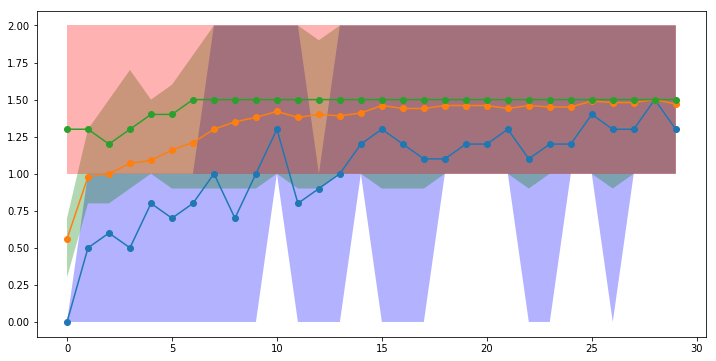

In [13]:
data.append(run_part1(5))

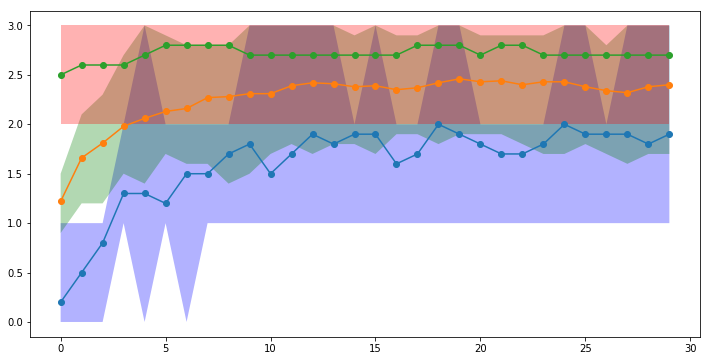

In [14]:
data.append(run_part1(10))

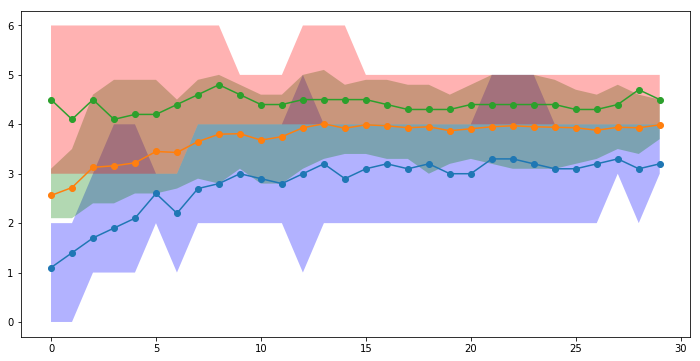

In [15]:
data.append(run_part1(20))

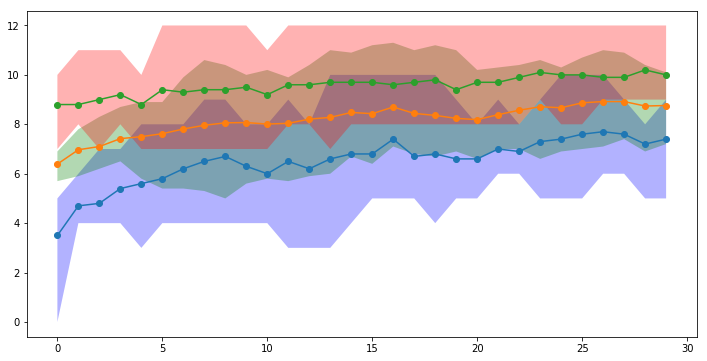

In [16]:
data.append(run_part1(50))

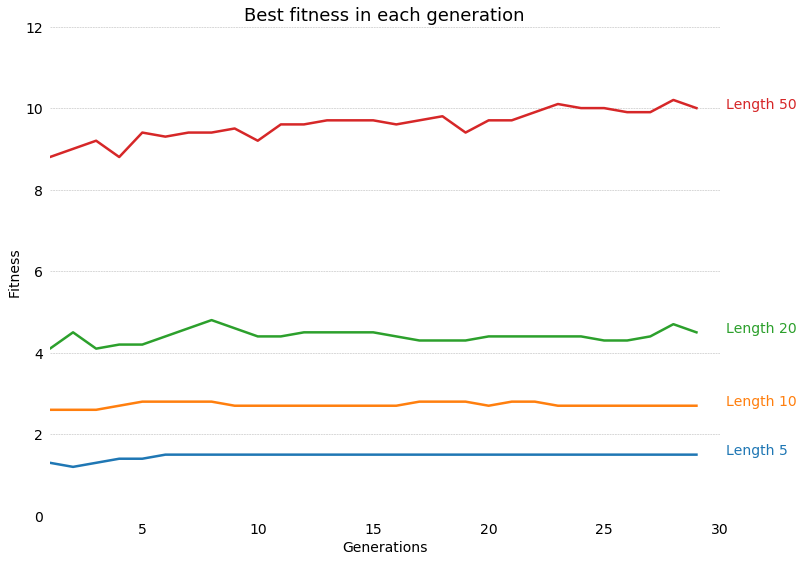

In [17]:
functions = ['Length 5', 'Length 10', 'Length 20', 'Length 50']
data_plot = []
for element in data:
    length, run_stats = element
    shortest = min([len(run_stat) for run_stat in run_stats])
    truncated = np.array([run_stat[:shortest] for run_stat in run_stats])
    data_plot.append(truncated[:, :, 2].mean(0))
data_plot = np.array(data_plot)
    
xmin = 1
xmax = 30
ymin = 0
ymax = 12
ystep = 2

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(12, 9))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(ymin, ymax)    
plt.xlim(xmin, xmax)    
  
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(range(ymin, ymax+1, ystep), [str(x) for x in range(ymin, ymax+1, ystep)], fontsize=14)    
plt.xticks(fontsize=14)    
  
# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
for y in range(ymin, ymax+1, ystep):    
    plt.plot(range(xmin, xmax+1), [y] * len(range(xmin, xmax+1)), "--", lw=0.5, color="black", alpha=0.3)    

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")   
  
for rank, column in enumerate(functions):    
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.    
    plt.plot(data_plot[rank], lw=2.5, color=tableau20[rank*2])  
    y_pos = data_plot[rank][30-1:]
    plt.text(xmax*1.01, y_pos, column, fontsize=14, color=tableau20[rank*2])

plt.title('Best fitness in each generation', fontsize=18)
plt.xlabel('Generations', fontsize = 14)
plt.ylabel('Fitness', fontsize = 14)

plt.show()

Implementation of (µ, λ) - Evolutionary Strategy (using uncorrelated mutation with $N \sigma’s$ to minimize the following function:
$$ f(x) = \sum_{i=0}^{N-1} \left[ (1-x_i)^2 + 100(x_{i+1}-x_i^2)^2\right]$$

known as the Rosenbrock function ( http://en.wikipedia.org/wiki/Rosenbrock_function), where N is the number of dimensions, and $−5 ≤ x_i ≤ 10$, $i = 1, 2, \dots, N$.

In [18]:
def rosenbrock(x):
    return np.sum((1-x[:-1])**2 + 100*(x[1:] - x[:-1]**2)**2, axis=0)

In [19]:
def plot_surface():
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    
    G = np.meshgrid(np.arange(-1.0, 1.5, 0.05), np.arange(-1.0, 1.5, 0.05))
    R = rosenbrock(np.array(G))
    
    fig = plt.figure(figsize=(14,9))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(G[0], G[1], R.T, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)
    ax.set_zlim(0.0, 500.0)
    ax.view_init(elev=50., azim=230)
    plt.show()

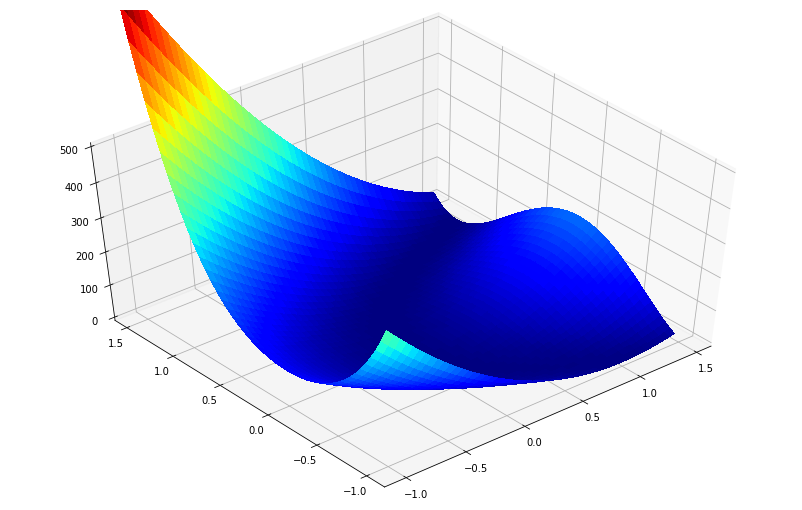

In [20]:
plot_surface()

In [21]:
def sample_offspring(parents, lambda_, tau, tau_prime, epsilon0=0.001):
    offsprings = []
    for index in np.random.choice(range(len(parents)), size=lambda_): 
        x, sigma = parents[index][:-1], parents[index][-1]
        
        sigma_new = max(sigma*np.exp(np.random.normal(0,tau)), epsilon0)
        x_new = x + np.random.normal(0, sigma_new, len(x))

        offsprings += [np.hstack((x_new, sigma_new))]
    offsprings = np.array(offsprings)
    return offsprings   

In [22]:
def ES(N=5, mu=2, lambda_=100, generations=100, epsilon0=0.001):
    parents = [np.hstack((np.random.uniform(-5,10,N), np.exp(np.random.randn()))) for i in range(mu)]
    tau = 1. / np.sqrt(N)
    tau_prime = 1
    min_fitnesses = []
    for generation in range(1, generations+1):
        tau_prime = 1 / np.sqrt(generation)
        tau = np.sqrt(tau_prime)
        offsprings = sample_offspring(parents, lambda_, tau, tau_prime, epsilon0=0.001)
        fitnesses = np.array([rosenbrock(pop[:-1]) for pop in offsprings])
        best = fitnesses.argsort()[:mu]
        parents, fitnesses = offsprings[best], fitnesses[best]
        min_fitnesses += [np.min(fitnesses)]
    return min_fitnesses, parents    

In [23]:
def plot_ES_curve(F):
    min_length = min(len(f) for f in F)
    F_plot = np.array([f[:min_length] for f in F])
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(np.mean(F_plot.T, axis=1))
    ax.fill_between(range(min_length), np.min(F_plot.T, axis=1), np.max(F_plot.T, axis=1), linewidth=0, facecolor="b", alpha=0.3, interpolate=True)
    ax.set_yscale('log')

In [24]:
def run_part2(length=5):
    run_stats = []
    for i in range(10):
        fit, solution = ES(N=length, mu=10, lambda_=100, epsilon0=0.0001, generations=500)
        run_stats.append(fit)
    plot_ES_curve(run_stats)
    return length, run_stats

In [39]:
ES_Data = []

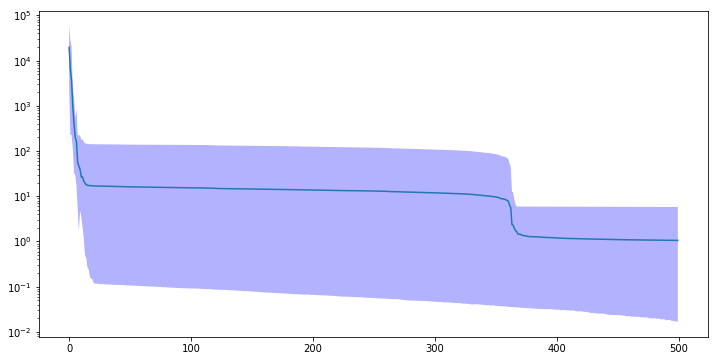

In [40]:
ES_Data.append(run_part2(5))

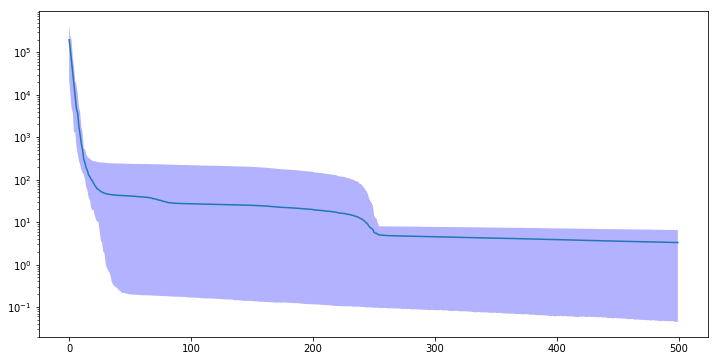

In [41]:
ES_Data.append(run_part2(10))

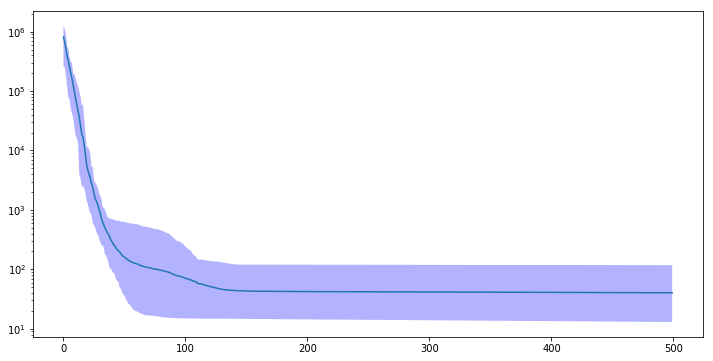

In [42]:
ES_Data.append(run_part2(20))

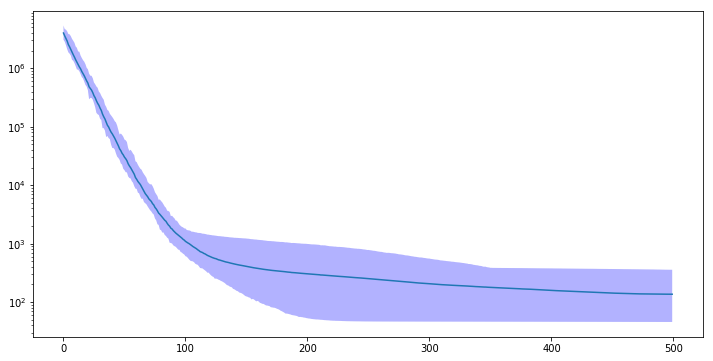

In [43]:
ES_Data.append(run_part2(50))

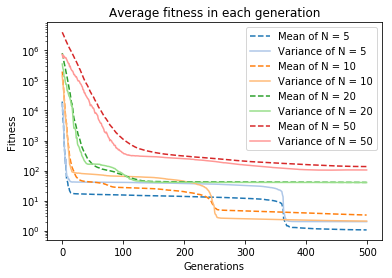

In [44]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

color_index = 0
for element in ES_Data:
    length, run_stats = element
    min_len = min([len(rs) for rs in run_stats])
    arr_run_stats = np.array([rs[:min_len] for rs in run_stats])
    shortest = min([len(run_stat) for run_stat in run_stats])
    truncated = np.array([run_stat[:shortest] for run_stat in run_stats])
    plt.plot(truncated.mean(0), color=tableau20[color_index], linestyle='dashed', label= "Mean of N = {}".format(length))
    plt.plot(truncated.std(0), color=tableau20[color_index + 1], label="Variance of N = {}".format(length))
    color_index += 2

plt.title('Average fitness in each generation')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()